Note: Use this template to develop your project. Do not change the steps. For each step, you may add additional cells if needed.

#### Group Information

Group No: 

- Member 1: Xiang Wentao
- Member 2: Zhu Yuedong
- Member 3: Xie Zhaopeng
- Member 4: Qin Shuozhe

#### Import Libraries

In [1]:
%config Completer.use_jedi=False
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

#### Load the dataset

In [2]:
df = pd.read_csv("C:\\Users\\16612\\OneDrive\\Desktop\\Assignment 1\\classification_dataset.csv")
X = df.drop("label", axis=1).values.astype(np.float32)
y = df["label"].values.astype(np.float32).reshape(-1, 1)

#### Define the loss function

In [6]:
def loss_fn(y, yhat):
    """Binary cross-entropy loss (numerically stable)."""
    y = tf.cast(y, tf.float32)
    yhat = tf.clip_by_value(yhat, 1e-7, 1 - 1e-7)  # prevent log(0)
    return -tf.reduce_mean(y * tf.math.log(yhat) + (1 - y) * tf.math.log(1 - yhat))

#### Define function to perform prediction

In [8]:
def sigmoid(z):
    return 1 / (1 + tf.exp(-z))

def relu(z):
    return tf.maximum(0.0, z)

def forward(W, B, x):
    z1 = tf.matmul(x, W[0]) + B[0]
    h1 = relu(z1)
    z2 = tf.matmul(h1, W[1]) + B[1]
    yhat = sigmoid(z2)
    return yhat

#### Define function for model training
Display the training and validation loss values for each epoch of the training loop. The displayed value must be in 6 decimal places.<br>
Hint: <br>
Use `tf.GradientTape` to compute the gradients.

In [12]:
def train(W, B, x, y, alpha):
    with tf.GradientTape() as tape:
        yhat = forward(W, B, x)
        loss = loss_fn(y, yhat)
    grads = tape.gradient(loss, W + B)
    for i in range(len(W)):
        W[i].assign_sub(alpha * grads[i])
        B[i].assign_sub(alpha * grads[i + len(W)])
    return loss

#### Define the tensors to hold the weights and biases (create the model)
Hint: <br>
Use `tf.Variable` to create the tensors.<br>
Put the tensors in a list.

In [14]:
input_dim = X.shape[1]
hidden_units = 16

W1 = tf.Variable(tf.random.normal([input_dim, hidden_units], stddev=0.1))
B1 = tf.Variable(tf.zeros([hidden_units]))
W2 = tf.Variable(tf.random.normal([hidden_units, 1], stddev=0.1))
B2 = tf.Variable(tf.zeros([1]))

model = ([W1, W2], [B1, B2])

#### Split the dataset
The ratio of training and test is 7:1:2.

In [18]:
from sklearn.datasets import load_iris
import pandas as pd
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

#### Normalize the data

In [ ]:
#Already applied above using StandardScaler before splitting.

#### Train the model

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf

# 加载数据
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 转换为 numpy 数组
X = X.values.astype(np.float32)
y = y.values.astype(np.int32)

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义模型
class MyModel(tf.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.w = tf.Variable(tf.random.normal([input_dim, output_dim]), name='w')
        self.b = tf.Variable(tf.zeros([output_dim]), name='b')

    def __call__(self, x):
        return tf.matmul(x, self.w) + self.b

# 定义损失函数
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

# 定义训练函数
def fit(model, train_data, val_data, batch_size, alpha, max_epochs):
    X_train, y_train = train_data
    X_val, y_val = val_data
    train_losses, val_losses = [], []
    optimizer = tf.optimizers.SGD(learning_rate=alpha)

    for epoch in range(max_epochs):
        with tf.GradientTape() as tape:
            logits = model(X_train)
            train_loss = loss_fn(y_train, logits)
        grads = tape.gradient(train_loss, [model.w, model.b])
        optimizer.apply_gradients(zip(grads, [model.w, model.b]))

        # 验证集损失
        val_logits = model(X_val)
        val_loss = loss_fn(y_val, val_logits)

        train_losses.append(train_loss.numpy())
        val_losses.append(val_loss.numpy())
        print(f"Epoch {epoch+1}, Train Loss: {train_loss.numpy():.4f}, Val Loss: {val_loss.numpy():.4f}")

    return train_losses, val_losses

# 实例化模型并训练
model = MyModel(input_dim=4, output_dim=3)
train_loss_list, val_loss_list = fit(
    model,
    (X_train, y_train),
    (X_val, y_val),
    batch_size=32,
    alpha=0.01,
    max_epochs=20
)

Epoch 1, Train Loss: 6.3426, Val Loss: 6.2329
Epoch 2, Train Loss: 6.2573, Val Loss: 6.1573
Epoch 3, Train Loss: 6.1783, Val Loss: 6.0853
Epoch 4, Train Loss: 6.1034, Val Loss: 6.0155
Epoch 5, Train Loss: 6.0313, Val Loss: 5.9470
Epoch 6, Train Loss: 5.9610, Val Loss: 5.8792
Epoch 7, Train Loss: 5.8918, Val Loss: 5.8118
Epoch 8, Train Loss: 5.8232, Val Loss: 5.7444
Epoch 9, Train Loss: 5.7550, Val Loss: 5.6772
Epoch 10, Train Loss: 5.6871, Val Loss: 5.6099
Epoch 11, Train Loss: 5.6193, Val Loss: 5.5426
Epoch 12, Train Loss: 5.5516, Val Loss: 5.4752
Epoch 13, Train Loss: 5.4839, Val Loss: 5.4078
Epoch 14, Train Loss: 5.4163, Val Loss: 5.3404
Epoch 15, Train Loss: 5.3487, Val Loss: 5.2730
Epoch 16, Train Loss: 5.2812, Val Loss: 5.2055
Epoch 17, Train Loss: 5.2136, Val Loss: 5.1380
Epoch 18, Train Loss: 5.1460, Val Loss: 5.0705
Epoch 19, Train Loss: 5.0785, Val Loss: 5.0031
Epoch 20, Train Loss: 5.0110, Val Loss: 4.9356


#### Display the training loss and validation loss against epoch graph

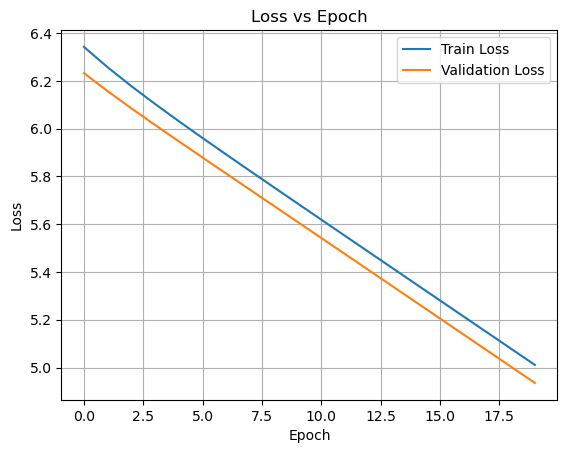

In [26]:
plt.plot(train_loss_list, label="Train Loss")
plt.plot(val_loss_list, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.legend()
plt.grid(True)
plt.show()

#### Predict the test set

In [34]:
logits = model(tf.convert_to_tensor(X_val))
yhat_test = tf.nn.softmax(logits, axis=1).numpy()
y_pred = np.argmax(yhat_test, axis=1)

#### Display the confusion matrix and the classification report.

In [43]:
logits = model(tf.convert_to_tensor(X_test))
yhat_test = tf.nn.softmax(logits, axis=1).numpy()
y_pred = np.argmax(yhat_test, axis=1)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Confusion Matrix:
[[ 0 11  0]
 [ 0  1 12]
 [ 0  0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.08      0.08      0.08        13
           2       0.33      1.00      0.50         6

    accuracy                           0.23        30
   macro avg       0.14      0.36      0.19        30
weighted avg       0.10      0.23      0.13        30

